# U.T. 1. Introducción. Conceptos de machine learning.

# Nuestra primera red neuronal
## Qué es una neurona
![](img/ut01_10.png)

- El concepto matemático de neurona viene del concepto fisiológico
- El funcionamiento tradicional de una neurona se basa en recibir estímulos de diferentes fuentes y si la activación supera un umbral la neurona física se activará
- La neurona artificial tiene una serie de entradas
- Cada entrada está ponderada por un valor (w)
- La función de activación determinará con todos los datos si se debe transmitir o no el resultado a la salida
- La primera implementación que se hizo fue el perceptron

![](img/ut01_11.png)

- Una neurona es capaz de realizar un ajuste lineal, es decir, separar un conjunto de datos mediante una recta.
- Geométricamente el parámetro $w_0x_0$ representa el desplazamiento con respecto al eje Y o BIAS (tendencia)
- El resto de parámetros indicarán la pendiente de la recta con respecto al eje X

![](img/ut01_12.png)

## Programación del Perceptron

El algoritmo para implementar un perceptron es:
- Inicialización de pesos (w) a cero o un valor aleatorio pero no todos a cero o no converge el algoritmo.
- Para cada ejemplo.
    - Calcular el valor de salida.
    - Actualizar los pesos $w_j≔w_j+ Δw_j$.
        - El incremento de cambio ($Δw_j$) se calcula como: La tasa de aprendizaje por La diferencia entre
      el valor real menos el predicho, todo ello por el valor de entrada.  $Δw_j = η*(valorReal – valorPred) * x_j$
        - Todos los pesos se actualizan a la vez, por lo que el cálculo del cambio solo se hace una vez.
        - La tasa de cambio (η) suele estar entre 0 y 1.
        - La convergencia del perceptrón solo será posible si los datos son linealmente separables.

In [1]:
import numpy as np
# Vamos a separar la función And a través de un perceptron
#              0      1
#       0     0      0
#       1     0      1
# Cumple el requisito que sea linealmente separable.

X = np.array([[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])  # Entradas
Y = np.array([0,   # poner a 1 para probar el OR
                       0,
                       0,
                       1])  # Salidas
W = np.random.rand(2)  # Pesos aleatorios a dos características
print("Pesos antes:", W)
E = []  # Errores producidos en todas las épocas
def func_activacion(X_actual, W_actual):
    salida = 0
    if len(X_actual) == len(W_actual):
        salida = np.sum(X_actual * W_actual)
    umbral = 0.5
    if salida > umbral:
        return 1
    else:
        return 0


#  probar tasas de aprendizaje mayores a .5 para ver qué pasa
#  se llamará una vez por cada ejemplo
def actualizar_pesos(valor_real, valor_predicho, ejemplo, tasa_aprendizaje=0.1):
    global W  # Para poder modificar los pesos
    # ejemplo es el array de entradas (X1, X2) una fila completa
    # W es el array de pesos. entrada y pesos deben tener la misma dimensión
    # los operadores + y * en numpy operan elemento a elemento

    incremento_de_los_pesos = 0
    if len(ejemplo) == len(W):
        incremento_de_los_pesos = tasa_aprendizaje * (valor_real - valor_predicho)
                                                     # 0.1 * (0 - 1) = 0.1 * -1 = -0.1
    # se actualizan todos los pesos con la entrada actual a la vez
    W = W + incremento_de_los_pesos * ejemplo
          # [0.1, 0] + -0.1 * [0, 1] = [0.1, 0] + [0, -0.1] = [0.1, -0.1]
    return incremento_de_los_pesos

def fit():
    # Variar este parámetro para ver qué ocurre si damos menos vueltas
    epocas = 10
    # con una única vuelta no se entrena al perceptron, hace falta varias
    for epoca in range(epocas):
       # se almacenarán los errores por cada ejemplo en cada vuelta
      errores_epoca = []
      for inx in range(len(X)):  # recorremos todos los datos de ejemplo
            predicho = func_activacion(X[inx], W)
            # retroporpagación
            errores = actualizar_pesos(Y[inx], predicho, X[inx])
            errores_epoca.append(errores)

      # Guardamos los errores de todas las épocas
      E.append(errores_epoca)

fit()
print("Errores por época:", E)
print("Pesos después:", W)

# Validación
acierto = error = 0
for elemento, resultado in zip(X, Y):
    if func_activacion(elemento, W) == resultado:
        acierto += 1
    else:
        error += 1

print("aciertos:", acierto, "errores:", error)
print("Porcentaje error:", error/(error+acierto))


print(func_activacion([1, 1], W))  # 1
print(func_activacion([1, 0], W))  # 0
print(func_activacion([0, 1], W))  # 0
print(func_activacion([0, 0], W))  # 0


Pesos antes: [0.09796323 0.26925845]
Errores por época: [[0.0, 0.0, 0.0, 0.1], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]
Pesos después: [0.19796323 0.36925845]
aciertos: 4 errores: 0
Porcentaje error: 0.0
1
0
0
0


## Con el dataset Iris

In [2]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta   # tasa de aprendizaje
        self.n_iter = n_iter  # número de épocas
        self.random_state = random_state   # para reproducir los resultados
        self.w_ = []    # pesos del perceptron
        self.errors_ = []

    def net_input(self, X):   # valor de la red
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def __str__(self):
        return str(self.w_)

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # Habrá tantos pesos como características en X + uno para X0
        # se inicializan a la normal
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1] + 1)
        self.errors_ = []

        for _ in range(self.n_iter):   #Número deépocas
            errors = 0
            for xi, target in zip(X, y):   # recorremos todos los ejemplos
                #  Δwj = η*(target – valor_pred) * xj
                update = self.eta * (target - self.predict(xi))
                # wj ≔wj+ Δwj.
                self.w_[1:] += update * xi   #  todos los pesos menos W0
                self.w_[0] += update     # actualizar W0
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self


In [3]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [1, 1, 1, -1]
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(np.array(X), y)  # Función AND  -1 Verdadero 1 Falso
print(ppn)
print(ppn.predict([1, 1]))
print(ppn.predict([0, 1]))
print(ppn.predict([1, 0]))
print(ppn.predict([0, 0]))

[ 0.41624345 -0.40611756 -0.20528172]
-1
1
1
1


       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


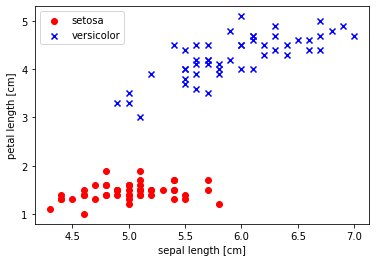

(100, 2) (100,)


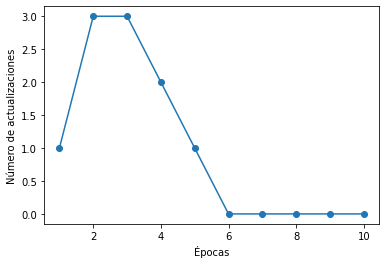

[-0.38375655 -0.70611756  1.83471828]
1
-1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#Preparación de los datos (Preprocesado)
df = pd.read_csv("iris.data", header=None, encoding='utf-8')
print(df.tail())
y = df.iloc[0:100, 4].values   # cogemos solo los 100 primeros de la última caract.
y = np.where(y == 'Iris-setosa', -1, 1)  # -1 Iris-setosa  # convertir a números
X = df.iloc[0:100, [0, 2]].values   # cogemos 100, solo dos características la 0 y la 2

# Visualización de los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Elección del algoritmo y Entrenamiento
ppn = Perceptron(eta=0.1, n_iter=10)
print(X.shape, y.shape)
ppn.fit(X, y)

# Validación
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.show()

# Predicciones
print(ppn)
print(ppn.predict([5, 3]))   # versicolor  (1)
print(ppn.predict([5, 1]))   # setosa   (-1)


![](img/ut01_13.png)


# Convergencia del aprendizaje
## Adeline
La principal diferencia es que los pesos se actualizan con base a una función lineal de activación en vez de la
función del perceptrón basada en un umbral

![](img/ut01_14.png)

## Qué es el gradiente matemático

- El gradiente representa la pendiente de la recta tangente a la gráfica de una función en un punto con respecto al
eje X. Más precisamente, el gradiente apunta a la parte de la gráfica en la cual tiene un mayor incremento.

![](img/ut01_15.png)

- La pendiente se calcula a partir de las derivadas parciales y por tanto es un vector

![](img/ut01_16.png)

- El vector gradiente siempre es perpendicular a las componentes
- El vector gradiente siempre indica la dirección de máximo cambio
- Cada una de las coordenadas del vector gradiente son las derivadas parciales en la correspondientes variables
- Cada una de las coordenadas son perpendiculares entre sí

![](img/ut01_17.jpg)

En la imagen vemos un vector gradiente en rojo correspondiente a las dos componentes del mismo según los ejes x, y
en morado.

## Mejora en la convergencia
- La mayoría de los algoritmos se beneficiarán de que las características sean comparables o similares
- **Estandarización**: Se cambiarán los datos de una característica para ajustarse a la Normal
- Se hace calculando la media y la desviación típica de la característica.
- A cada dato se le resta la media y se le divide por la desviación típica $ x_j=(x_j-η_j)/σ_j $.